In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [21]:
"""
Загрузка data frame
"""
data = pd.read_csv('bank_transactions.csv')
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [22]:
"""
Всего используется 9 столбцов, которые описывают информацию о транзакции.
Простые типы имеют баланс владельца, количество транзакций и общая сумма транзакций.
"""
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [23]:
"""
Необходимо привести данные к нормальному виду,
а именно удалить различные анамалии и пустые значения
"""
data.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [24]:
"""
Относительно одного миллиона строк, пустые значения
принимает малое количество данных, если мы их уберем,
то координально ничего не изменится
"""
data = data.dropna()

In [25]:
"""
Теперь попробуем отловить различные выбросы и анамалии.
"""
print("Количество транзакций:\n",data['CustomerID'].value_counts())
print("День рождения:\n",data['CustomerDOB'].value_counts())
print("Пол:\n",data['CustGender'].value_counts())
print("Город:\n",data['CustLocation'].value_counts())
print("Баланс:\n",data['CustAccountBalance'].value_counts())
print("День транзакции:\n",data['TransactionDate'].value_counts())
print("Объем транзакций:\n",data['TransactionAmount (INR)'].value_counts())

Количество транзакций:
 C5533885    6
C7537344    6
C1736254    6
C1113684    6
C4327447    6
           ..
C1610768    1
C4929259    1
C1026114    1
C6817889    1
C6420483    1
Name: CustomerID, Length: 879358, dtype: int64
День рождения:
 1/1/1800    56292
1/1/89        809
1/1/90        784
6/8/91        698
1/1/91        665
            ...  
2/12/51         1
20/3/52         1
26/9/47         1
4/10/41         1
24/10/44        1
Name: CustomerDOB, Length: 17233, dtype: int64
Пол:
 M    760978
F    280635
T         1
Name: CustGender, dtype: int64
Город:
 MUMBAI                            101997
NEW DELHI                          84143
BANGALORE                          81330
GURGAON                            73594
DELHI                              70549
                                   ...  
DISTRICT PURI                          1
DHAKOLA                                1
KANDESHWAR STATION NAVI MUMBAI         1
HOSHIAR PUR                            1
IMPERIA THANE WEST     

In [26]:
"""
Количество транзаций не имеет никаких анамалий
значение варируется от 1 до 6.
Если рассмотрим дни рождения, то прослеживается
нечто странное, двухсот летних людей крайне много,
хотя в мире несуществует и одного.
Придется чистить долгожителей.
Также завелся один трансформер, в целях безопасности его тоже удалим.
Города распределены равномерно.
Если заметить количество транзакций, то они все происходили в период
с августа по октябрь 2016
Объем транзакций показывает также адекватные значения.
"""
data = data[data.CustomerDOB != '1/1/1800']#Удалили долгожителей
data = data[data.CustGender != 'T']#Удалим трансформера
"""
В целом данные обработаны, теперь можно попробовать выделеть некоторые сегменты.
"""

'\nВ целом данные обработаны, теперь можно попробовать выделеть некоторые сегменты.\n'

<AxesSubplot: >

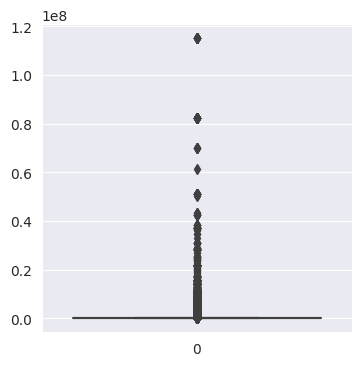

In [27]:
"""
Теперь проанализируем различные выбросы и также уберем их.

"""
plt.figure(figsize=(4,4))
sns.boxplot(data['CustAccountBalance'])

In [28]:
"""
Данных, принадлежащих предполагаемому выбросу много, поэтому оставимм
"""
data[data.CustAccountBalance > 1000000].count

<bound method DataFrame.count of         TransactionID CustomerID CustomerDOB CustGender CustLocation  \
196              T197   C7512180    11/11/78          M     ZIRAKPUR   
366              T367   C6784890     10/5/71          M        NOIDA   
390              T391   C4417679     19/1/21          M    NEW DELHI   
404              T405   C2811565    18/11/75          M      CHENNAI   
578              T579   C7732922     17/5/68          M    NEW DELHI   
...               ...        ...         ...        ...          ...   
1048160      T1048161   C4712939      8/1/70          M   VIJAYAWADA   
1048413      T1048414   C1137637     21/4/65          M        NOIDA   
1048442      T1048443   C2635682    11/10/88          F    JALANDHAR   
1048466      T1048467   C1219639     29/1/89          M       NAGPUR   
1048483      T1048484   C4510034     19/2/74          M    AHMEDABAD   

         CustAccountBalance TransactionDate  TransactionTime  \
196              1130141.97          7

<AxesSubplot: >

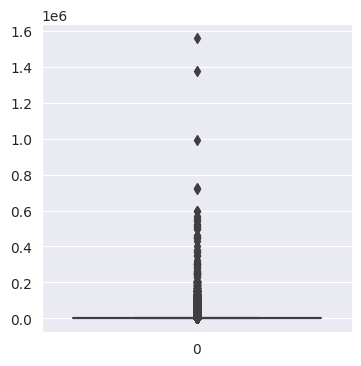

In [29]:
plt.figure(figsize=(4,4))
sns.boxplot(data['TransactionAmount (INR)'])

In [30]:
"""
Здесь тоже досточно много, поэтому не трогаем.
"""
data[data.CustAccountBalance > 1500000].count

<bound method DataFrame.count of         TransactionID CustomerID CustomerDOB CustGender  \
578              T579   C7732922     17/5/68          M   
905              T906   C3414431      1/1/80          M   
1057            T1058   C5442656      2/1/86          M   
1088            T1089   C3228213      7/7/62          M   
1206            T1207   C8842737    28/10/86          M   
...               ...        ...         ...        ...   
1048076      T1048077   C3816391      9/1/78          F   
1048086      T1048087   C8338953      8/8/81          M   
1048146      T1048147   C7885679     15/4/74          M   
1048413      T1048414   C1137637     21/4/65          M   
1048466      T1048467   C1219639     29/1/89          M   

                              CustLocation  CustAccountBalance  \
578                              NEW DELHI          2916683.97   
905                             CHANDIGARH          1586508.61   
1057                                BOKARO          3482113.

In [31]:
"""
Преоборазуем время к нормальному типу
"""
data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'], format = '%d/%m/%y')
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], format = '%d/%m/%y')
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


In [32]:
"""
Найдем возраст, чтобы у нас была ещё одна метрика для кластерного анализа.
"""
def age(DOB):
    today = date.today()
    return today.year - DOB.year - ((DOB.month, today.day) < (DOB.month, DOB.day)) - 6

data['Age'] = data.CustomerDOB.apply(age)

print("Возраст:\n",data['Age'].value_counts())

Возраст:
  25    71939
 26    70905
 24    69459
 27    64398
 23    62217
       ...  
 6         2
-8         2
-9         2
-10        2
-2         1
Name: Age, Length: 99, dtype: int64


In [33]:
"""
Выкинем отрицательный возраст
"""
data = data[data.Age > 0]
print("Возраст:\n",data['Age'].value_counts())

Возраст:
 25    71939
26    70905
24    69459
27    64398
23    62217
28    60118
29    54605
22    49104
30    47253
31    42701
32    37118
33    33830
21    31697
34    29094
35    24937
36    24026
37    19968
20    18234
38    17058
39    15666
40    13639
41    11259
19    10612
42    10101
43     9098
44     8121
45     7251
46     6381
18     5620
47     1766
17     1647
16      533
15      233
14      120
13      103
12       71
11       62
9        32
7        28
8        28
10       24
1        22
3        22
2        20
5        16
4        14
6         2
Name: Age, dtype: int64


In [34]:
"""
Приведем данные пола к бинарному виду.
"""
data.CustGender.replace(['F','M'], [0,1], inplace=True)
data.CustGender = data.CustGender.astype(np.int64)

/tmp/ipykernel_5220/2375569863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.CustGender.replace(['F','M'], [0,1], inplace=True)
/tmp/ipykernel_5220/2375569863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.CustGender = data.CustGender.astype(np.int64)


In [ ]:
"""
Прозведем визуализацию основных характеристик дата-сета
"""

/tmp/ipykernel_5220/2585712687.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='Blues')


<AxesSubplot: >

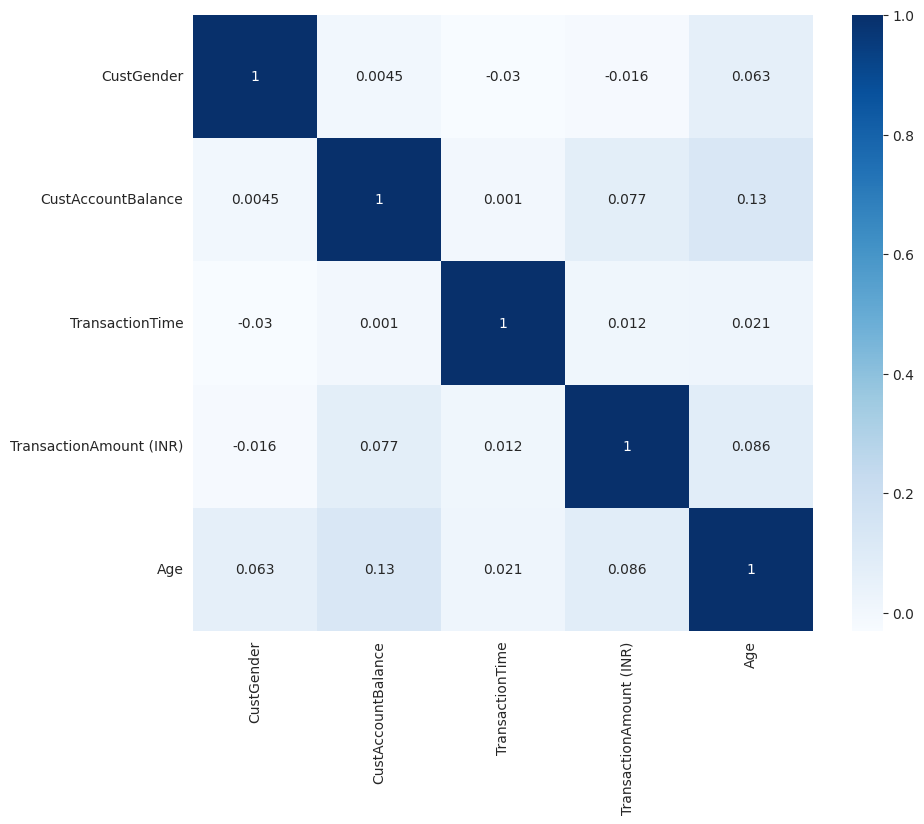

In [35]:
"""
Здесь можно обратить внимание на потенциальную
взаимосвязь между балансом и суммой транзакций,
а также между возрастом и балансом
"""
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='Blues')

In [43]:
"""
Теперь попробуем кластеризовать и найти интересные закономерности
"""
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

varibals = ['CustAccountBalance','TransactionTime', 'TransactionAmount (INR)', 'Age', 'CustGender']

In [44]:
"""
Стандартизируем данные, чтобы вес был одинаковый
"""
scaler = StandardScaler()
features = scaler.fit_transform(data[varibals])

In [45]:
"""
Определим среднеквадратическое ошибок, чтобы определить
сколько кластеров необходимо выделить
"""
sse = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

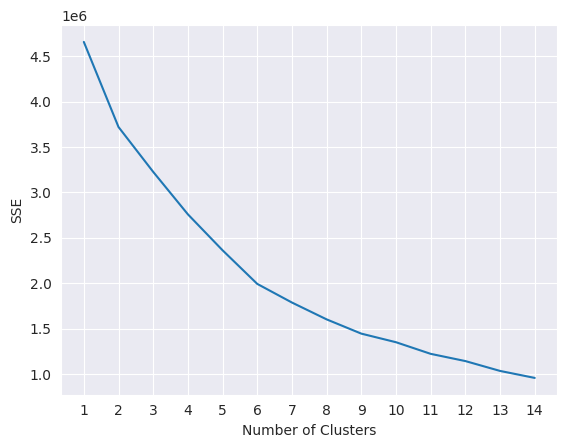

In [46]:
"""
Видно, что лучший вариант, это кластеризовать
на 6 групп.
"""
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [47]:
"""
Выделим 6 кластеров
"""
kmeans = KMeans(n_clusters=6)
kmeans.fit(features)
sse.append(kmeans.inertia_)

In [48]:
data['cluster'] = kmeans.labels_

/tmp/ipykernel_5220/2043384854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.labels_


In [49]:
"""
Выведем среднии и медианы.
"""
data.groupby('cluster').agg({v: ['mean', 'median'] for v in varibals})

CustAccountBalance             TransactionTime            \
                      mean      median            mean    median   
cluster                                                            
0             6.645440e+04    18248.69   164691.090114  171738.0   
1             1.556011e+05    30064.72   164479.328614  165959.0   
2             4.714856e+04    11432.55   189280.054872  192650.0   
3             3.032352e+05    82391.18   157792.878124  162548.0   
4             7.762558e+06  5935338.90   156557.906155  163906.0   
5             4.972597e+04    11020.92    89382.556957  102654.0   

        TransactionAmount (INR)                  Age        CustGender         
                           mean    median       mean median       mean median  
cluster                                                                        
0                   1238.772775    500.00  27.335240   26.0   0.000000    0.0  
1                   1815.189574    700.00  38.080915   37.0   0.917387    1.0  
2                    927.486876    337.34  26.122139   26.0   1.000000    1.0  
3                  71875.261392  53926.00  32.643599   32.0   0.710111    1.0  
4                   4573.507843   1500.00  36.302255   36.0   0.826935    1.0  
5                    809.676474    247.00  26.627167   26.0   0.962162    1.0

In [50]:

"""
На основе полученных данных, можно выдлить портреты групп.
1)Мужчины, возраста около 26 лет, они не очень богаты
так как имеют на счетах не очень много денег и объем
транзакций тоже небольшое. В отношении этих параметров
кластер(Кластер 2). Он аналогичен кластеру 5 по основынм
характеристикам
2)Аналогично кластеру 2, только уже рассматриваются женщиеы,
(Кластер 0)
3)Преимущественно мужчины, возраста около 37 лет, которые
имеют больший баланс и больше сумму транзакций. Предпологаю,
что это уже ближе к среднему классу(Кластер 1).
4)Преимущественно мужчины имеющие возратса от 30-40 лет,
которые богаты и проводят большие транзакции.(Кластеры 3,4)
"""
data['cluster'].value_counts()

2    323354
0    234381
5    191952
1    177223
3      2601
4      1641
Name: cluster, dtype: int64

In [51]:
"""
Объединяем кластеры (2,5) и (3,4).
"""
data['cluster'] = data['cluster'].replace([5, 4], [2, 3])
data['cluster'].value_counts()

/tmp/ipykernel_5220/913340573.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = data['cluster'].replace([5, 4], [2, 3])


2    515306
0    234381
1    177223
3      4242
Name: cluster, dtype: int64

In [52]:
"""
Проведем когортный анализ для сегментов.
Выделенные кластеры и рассмотрим их.
Необходимо создать столбец с первой транзакцией.
"""
data['start_date'] = data.groupby('CustomerID')['TransactionDate'].transform('min')

/tmp/ipykernel_5220/1066167755.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['start_date'] = data.groupby('CustomerID')['TransactionDate'].transform('min')


In [53]:
"""
Теперь положим туда уникальных пользователей,
сгруппировав по уникальному номеру, дате транзакций
и кластеру.
"""
ddata = data \
        .groupby(['CustomerID', 'TransactionDate', 'start_date', 'cluster'], as_index=False)['TransactionID'] \
        .nunique()

In [54]:
ddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929910 entries, 0 to 929909
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   CustomerID       929910 non-null  object        
 1   TransactionDate  929910 non-null  datetime64[ns]
 2   start_date       929910 non-null  datetime64[ns]
 3   cluster          929910 non-null  int32         
 4   TransactionID    929910 non-null  int64         
dtypes: datetime64[ns](2), int32(1), int64(1), object(1)
memory usage: 31.9+ MB


In [69]:
"""
Разделим данные на полумесячные интервалы
"""
ddata['start_week'] = ddata['start_date'].apply(lambda x: x.replace(day = 1 + (x.day > 15) * 15 ))
ddata['start_week'].value_counts()

2016-08-01    366957
2016-08-16    273297
2016-09-01    250970
2016-09-16     36332
2016-10-16      2354
Name: start_week, dtype: int64

In [70]:
"""
Найдем разницу в полумесячных интервалах
"""
ddata['week_diff'] = ddata['TransactionDate'] - ddata['start_date']
ddata['week_diff'] = ddata['week_diff'].apply(lambda x: round(x.days/15))

In [71]:
"""
В n_users мы сохраним сколько уникальных пользователей в конкретном кластере
совершили транзакции.
"""
n_users = ddata.groupby(['start_week', 'week_diff', 'cluster'], as_index=False)['CustomerID'].nunique()

In [72]:
"""
Теперь преобразуемый данные таким образом, чтобы потомм
получить табличку. Для этого значение в индексе будет
соотвествовать колмчеству пользователей, а оси
будут означать интервал времени.
"""
cohorts = n_users.pivot_table(index=['start_week', 'cluster'], columns='week_diff', values='CustomerID')

<AxesSubplot: xlabel='week_diff', ylabel='start_week'>

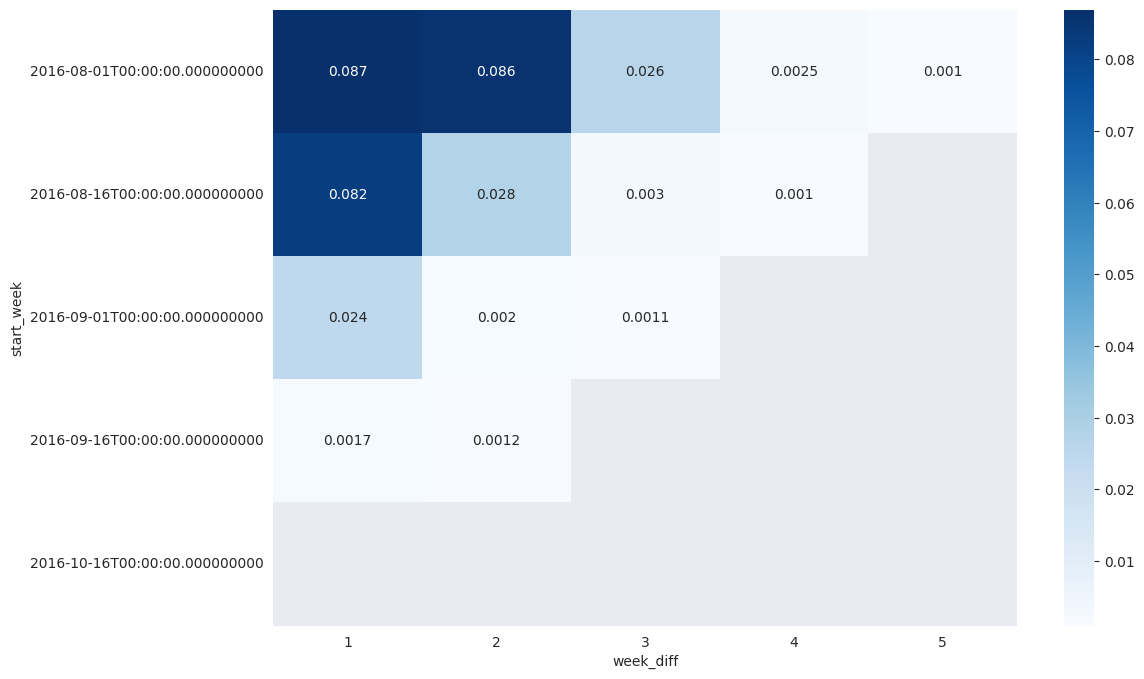

In [73]:
"""
Построим таблицу кластера 0
"""
retention = cohorts.divide(cohorts.iloc[:, 0], axis=0)
female_young_poor = retention.loc[:, 0, :].iloc[:, :15]
plt.figure(figsize=(12, 8))
sns.heatmap(female_young_poor.iloc[:,1:], annot=True, cmap='Blues')

<AxesSubplot: xlabel='week_diff', ylabel='start_week'>

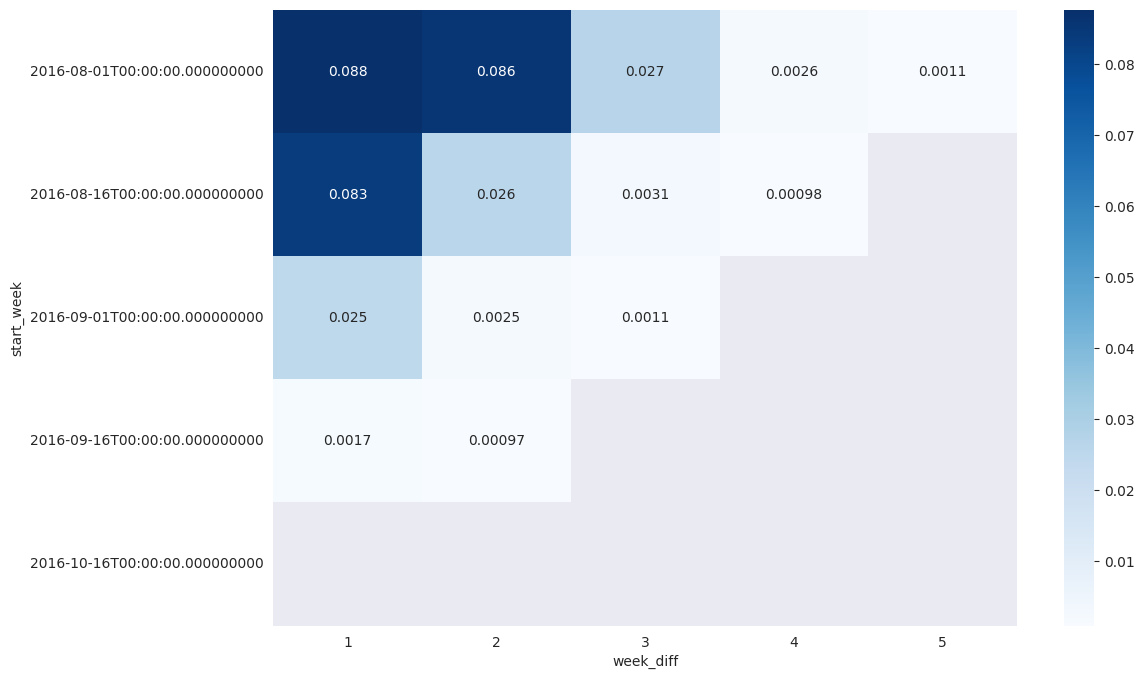

In [74]:
"""
Для кластера 1
"""
male_old_middle = retention.loc[:, 1, :].iloc[:, :15]
plt.figure(figsize=(12, 8))
sns.heatmap(male_old_middle.iloc[:,1:], annot=True, cmap='Blues')

<AxesSubplot: xlabel='week_diff', ylabel='start_week'>

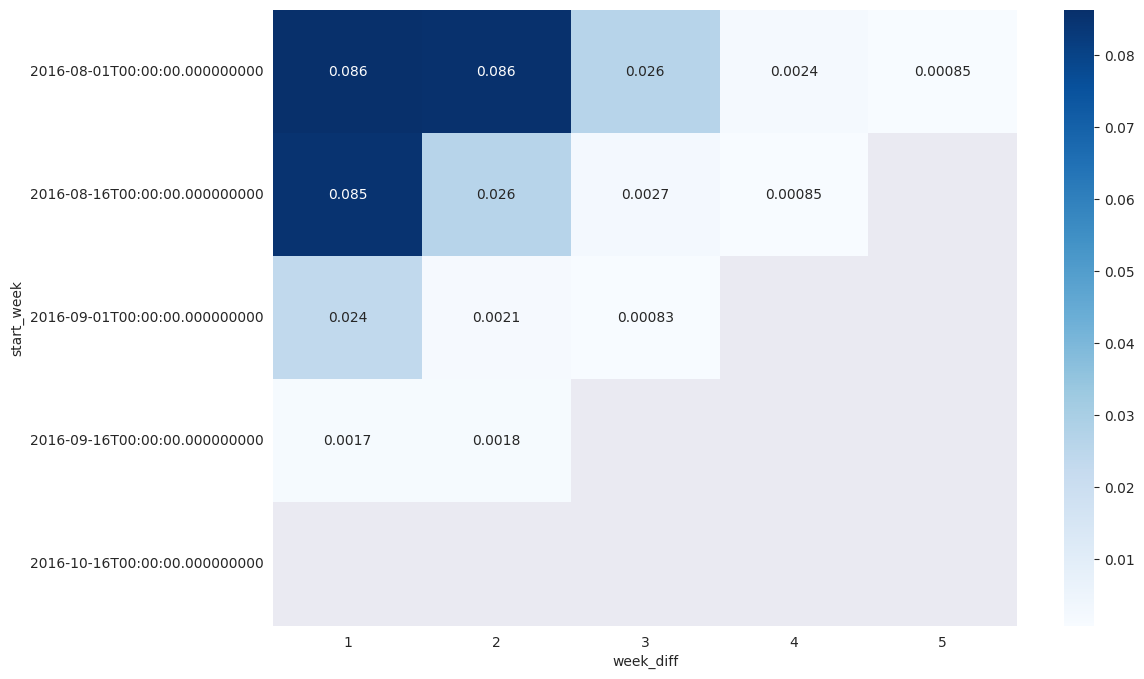

In [75]:
"""
для кластера 2
"""
male_young_poor = retention.loc[:, 2, :].iloc[:, :15]
plt.figure(figsize=(12, 8))
sns.heatmap(male_young_poor.iloc[:, 1:], annot=True, cmap='Blues')

<AxesSubplot: xlabel='week_diff', ylabel='start_week'>

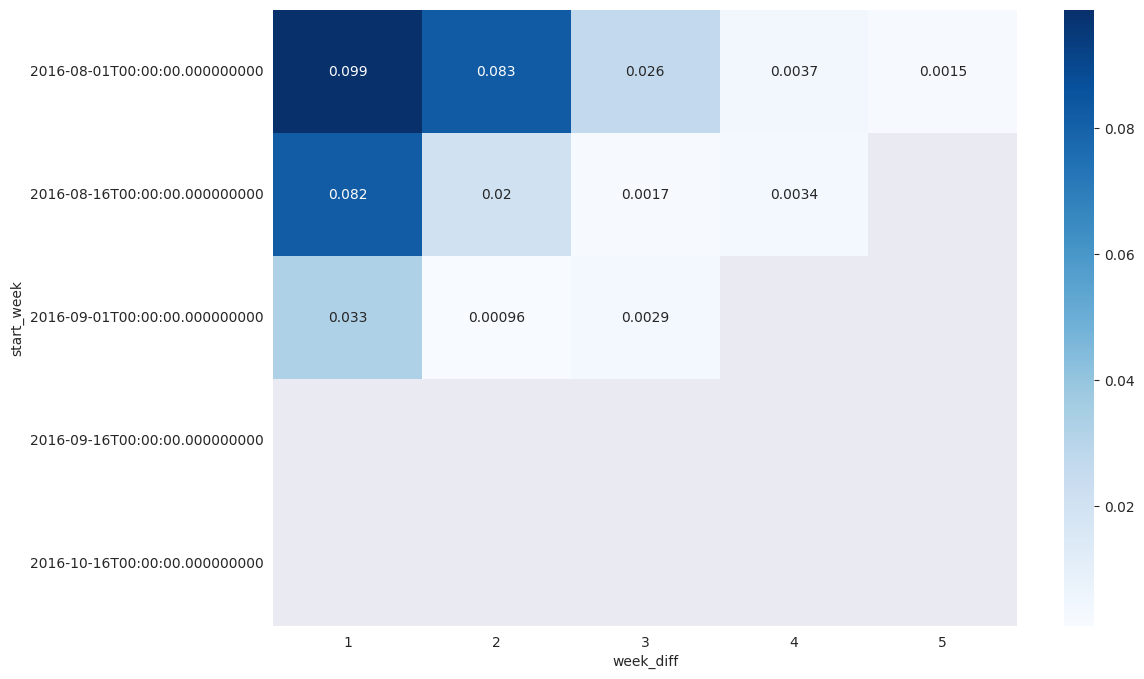

In [76]:
"""
для кластера 3
"""
male_old_rich = retention.loc[:, 3, :].iloc[:, :15]
plt.figure(figsize=(12, 8))
sns.heatmap(male_old_rich.iloc[:, 1:], annot=True, cmap='Blues')